<a href="https://colab.research.google.com/github/Ordaz-Yerikendy/Metodos-Numericos/blob/main/Polinomio%20Interpolante%20de%20Newton%20con%20Sympy%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def newton_interpolation(data):
    """
    Calcula el polinomio de interpolación de Newton y lo grafica.

    Args:
        data (list): Lista de tuplas con los datos. Cada tupla debe ser de la forma:
                     (xi, f(xi)) donde xi es la coordenada y f(xi) es el valor de la función en xi.

    Returns:
        sympy.Expr: El polinomio de interpolación de Newton en forma simbólica.
    """
    # Variables simbólicas
    x = sp.symbols('x')

    # Extraer nodos y valores
    z = [point[0] for point in data]
    f = [point[1] for point in data]

    # Construcción de la tabla de diferencias divididas
    n = len(z)
    divided_diff = [[0] * n for _ in range(n)]

    # Llenar la primera columna con f(xi)
    for i in range(n):
        divided_diff[i][0] = f[i]

    # Calcular diferencias divididas
    for j in range(1, n):
        for i in range(n - j):
            divided_diff[i][j] = (divided_diff[i + 1][j - 1] - divided_diff[i][j - 1]) / (z[i + j] - z[i])

    # Construcción del polinomio
    polynomial = divided_diff[0][0]
    for i in range(1, n):
        term = divided_diff[0][i]
        for j in range(i):
            term *= (x - z[j])
        polynomial += term

    # Simplificar el polinomio
    polynomial = sp.simplify(polynomial)

    # Graficar
    f_lambdified = sp.lambdify(x, polynomial, modules=['numpy'])
    x_vals = np.linspace(min(z) - 1, max(z) + 1, 500)
    y_vals = f_lambdified(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label="Polinomio de Newton", color="purple")

    # Graficar los puntos originales
    for xi, fi in data:
        plt.scatter(xi, fi, color="magenta", label="Datos originales" if xi == data[0][0] else "")

    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.title("Interpolación de Newton")
    plt.legend()
    plt.grid(color="pink", linestyle="--")
    plt.show()

    return polynomial

In [10]:
# Solicitar datos al usuario
def solicitar_datos():
    """
    Solicita al usuario los datos para construir la interpolación de Newton.

    Returns:
        list: Lista de datos ingresados por el usuario.
    """
    print("Ingrese los datos para la interpolación de Newton.")
    print("Para cada punto, proporcione en el formato: x f(x)")
    print("Ejemplo: 0 1  (para x=0, f(0)=1)")
    print("Cuando haya terminado, escriba 'fin'.")

    datos = []
    while True:
        entrada = input("Ingrese un punto: ")
        if entrada.lower() == 'fin':
            break
        valores = entrada.split()
        try:
            xi = float(valores[0])
            fi = float(valores[1])
            datos.append((xi, fi))
        except ValueError:
            print("Entrada no válida. Intente de nuevo.")

    return datos



Ingrese los datos para la interpolación de Newton.
Para cada punto, proporcione en el formato: x f(x)
Ejemplo: 0 1  (para x=0, f(0)=1)
Cuando haya terminado, escriba 'fin'.
Ingrese un punto: 1 2
Ingrese un punto: 0 4
Ingrese un punto: -3 -2
Ingrese un punto: fin


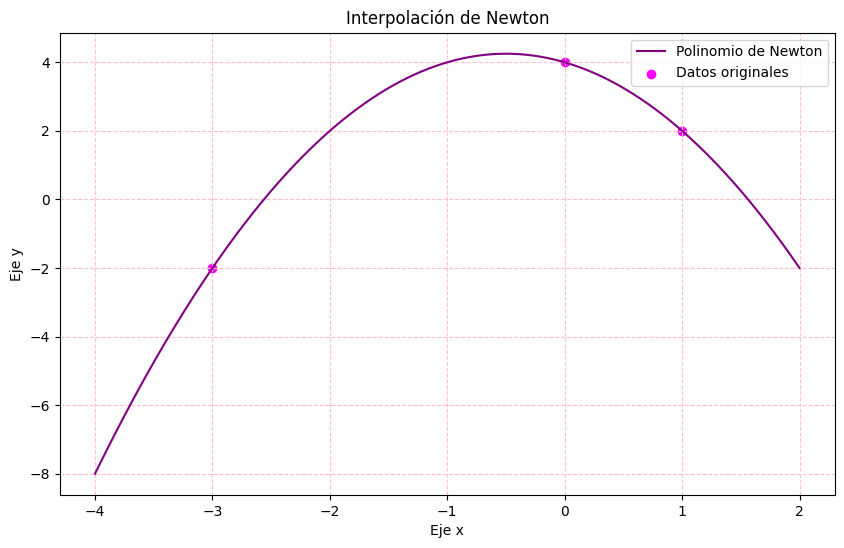

Polinomio de Newton: -1.0*x**2 - 1.0*x + 4.0


In [12]:
# Programa principal
def main():
    datos = solicitar_datos()
    if not datos:
        print("No se ingresaron datos.")
        return

    polinomio = newton_interpolation(datos)
    print("Polinomio de Newton:", polinomio)

if __name__ == "__main__":
    main()


Elaborado por: Yerikendy Ordaz